In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
dataset = pd.read_csv('toy_dataset.csv')
x = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:, -1].values

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [59]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[34500     0]
 [ 3000     0]]


C:\Users\evanz\AppData\Local\Temp\ipykernel_25516\2004824660.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


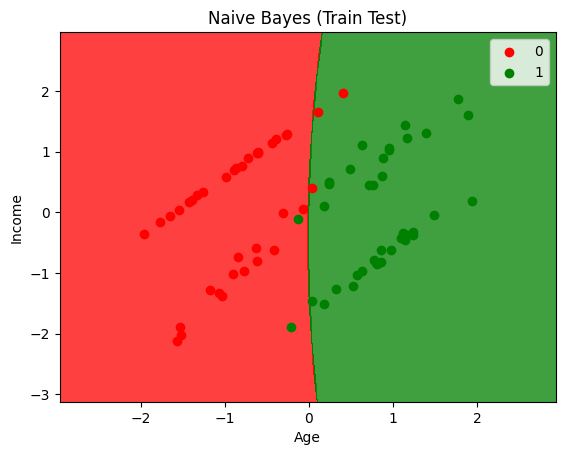

In [77]:

x1, x2 = np.meshgrid(np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01))

Z = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
Z = Z.astype(np.float64)  # atau np.int32 jika bilangan bulat
Z = Z.reshape(x1.shape)
plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes (Train Test)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


C:\Users\evanz\AppData\Local\Temp\ipykernel_25516\3479752355.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


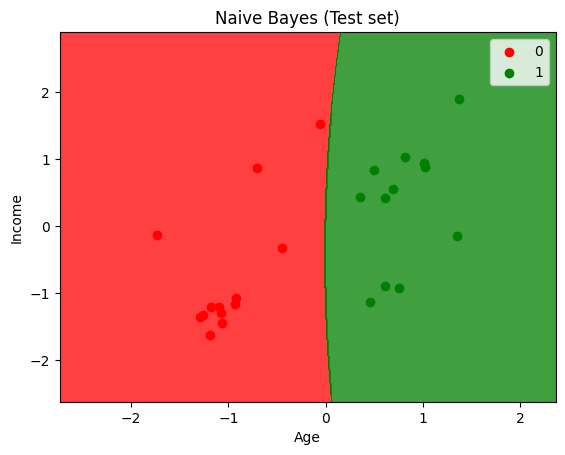

In [78]:
x1, x2 = np.meshgrid(np.arange(start=X_test[:, 0].min() - 1, stop=X_test[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_test[:, 1].min() - 1, stop=X_test[:, 1].max() + 1, step=0.01))
Z = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
Z = Z.astype(np.float64)  # Konversi ke tipe float64 jika diperlukan
Z = Z.reshape(x1.shape)
plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()
